# HW-07: Training a Deep Neural Network

In [1]:
# import common libraries
import numpy as np;  import pandas as pd;  import os; import time

# import ML-related libraries
import sys;  import sklearn;  import tensorflow as tf;  from tensorflow import keras
assert tf.__version__ >= "2.0"

# standardize RNG seed
np.random.seed(0)

# configure Matplotlib
%matplotlib inline
import matplotlib as mpl;  import matplotlib.pyplot as plt

# load CIFAR10 dsataset
from tensorflow.keras.datasets import cifar10
(Xtfull, Ytfull), (Xtest, Ytest)=cifar10.load_data()
Xvalid, Xtrain=Xtfull[:5000], Xtfull[5000:] # split input images
Yvalid, Ytrain=Ytfull[:5000], Ytfull[5000:] # split corresponding labels

# create function to quickly plot neural net training results
def plotHistory(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

print('Preparation complete!')

Preparation complete!


To confirm proper data selection, 20 random examples of images from the CIFAR dataset are displayed below.

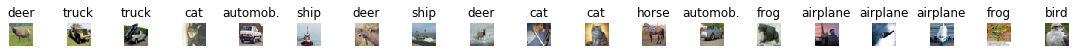

In [2]:
# randomly select indices for images to display
def showCIFAR(X,ind):
    datR=X[ind,:,:,0]/255.0
    datG=X[ind,:,:,1]/255.0
    datB=X[ind,:,:,2]/255.0
    return np.dstack((datR,datG,datB))

# define CIFAR IDs and random numbers
cifar={0:'airplane', 1:'automob.', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
pickMe=np.random.randint(1, high=Xtrain.shape[0], size=20)

# generate and iterate through subplots
plt.figure(figsize=(20,6))
for n in range(len(pickMe)-1):
    
    # display randomly-selected images
    plt.subplot(1, 20, n+1, frameon=False)
    plt.title( cifar[ int(Ytrain[pickMe[n]]) ], fontsize=12)
    plt.imshow( showCIFAR(Xtrain,pickMe[n]),  interpolation='nearest' )
    plt.axis('off')
    
plt.subplots_adjust(wspace=1.5, hspace=0.5)
plt.show()

# Excessive DNN
*Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function. (use a for loop!!)*

In [3]:
seedNo=0;  nEpoch=10;  tf.random.set_seed(seedNo);  np.random.seed(seedNo)

# initialize with flattener
model1=keras.models.Sequential()
model1.add( keras.layers.Flatten(input_shape=[32,32,3]) )

# append 20 layers of He-initialized dense layer of neurons with ELU activation
for layer in range(20):
    model1.add( keras.layers.Dense(100, kernel_initializer='he_normal', activation='elu') )
    
# append softmax output layer
model1.add( keras.layers.Dense(10, activation='softmax') )

# compile layers
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])

# train model
t1=time.time()
history1=model1.fit(Xtrain, Ytrain, epochs=nEpoch, validation_data=(Xvalid, Yvalid))
print('This model required', roundd(time.time() - t1,0) ,'s to train.')

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 25s 552us/sample - loss: nan - accuracy: 0.0999 - val_loss: nan - val_accuracy: 0.1010
Epoch 2/10
45000/45000 [==============================] - 21s 464us/sample - loss: nan - accuracy: 0.0999 - val_loss: nan - val_accuracy: 0.1010
Epoch 3/10
45000/45000 [==============================] - 21s 463us/sample - loss: nan - accuracy: 0.0999 - val_loss: nan - val_accuracy: 0.1010
Epoch 4/10
45000/45000 [==============================] - 21s 466us/sample - loss: nan - accuracy: 0.0999 - val_loss: nan - val_accuracy: 0.1010
Epoch 5/10
45000/45000 [==============================] - 21s 473us/sample - loss: nan - accuracy: 0.0999 - val_loss: nan - val_accuracy: 0.1010
Epoch 6/10
45000/45000 [==============================] - 21s 474us/sample - loss: nan - accuracy: 0.0999 - val_loss: nan - val_accuracy: 0.1010
Epoch 7/10
45000/45000 [==============================] - 21s 468us/sample - loss

# ADAM optimization

*Using Adam optimization and early stopping, train the network on the CIFAR10 dataset. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.*

In [4]:
# create sequence of DNN layers
model2=keras.models.Sequential([keras.layers.Flatten(input_shape=[32,32,3]),
                                keras.layers.Dense(500, kernel_initializer='he_normal', activation='elu'),
                                keras.layers.Dense(200, kernel_initializer='he_normal', activation='elu'),
                                keras.layers.Dense(100, kernel_initializer='he_normal', activation='elu'),
                                keras.layers.Dense(50,  kernel_initializer='he_normal', activation='elu'),
                                keras.layers.Dense(10,  kernel_initializer='he_normal', activation='softmax')])

# create callback for early stopping
cb2=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# compile layers
adamLR=0.001
adamB1=0.9
adamB2=0.999
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=adamLR, beta_1=adamB1, beta_2=adamB2),
              metrics=['accuracy'])

# train model
t2=time.time()
history2=model2.fit(Xtrain, Ytrain, epochs=nEpoch, validation_data=(Xvalid, Yvalid), callbacks=[cb2])
print('This model required', round(time.time() - t2,0) ,'s to train.')

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 50s 1ms/sample - loss: 12.9839 - accuracy: 0.1217 - val_loss: 2.3037 - val_accuracy: 0.1008
Epoch 2/10
45000/45000 [==============================] - 48s 1ms/sample - loss: 2.4865 - accuracy: 0.1020 - val_loss: 2.3046 - val_accuracy: 0.0972
Epoch 3/10
45000/45000 [==============================] - 48s 1ms/sample - loss: 2.3048 - accuracy: 0.0989 - val_loss: 2.3065 - val_accuracy: 0.1010
Epoch 4/10
45000/45000 [==============================] - 48s 1ms/sample - loss: 2.3055 - accuracy: 0.1012 - val_loss: 2.3121 - val_accuracy: 0.0972
Epoch 5/10
45000/45000 [==============================] - 48s 1ms/sample - loss: 2.3059 - accuracy: 0.1010 - val_loss: 2.3085 - val_accuracy: 0.0972
Epoch 6/10
45000/45000 [==============================] - 49s 1ms/sample - loss: 2.3068 - accuracy: 0.0990 - val_loss: 2.3065 - val_accuracy: 0.1038
Epoch 7/10
45000/45000 [==============================] 

# Batch Normalization
*Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?*

In [5]:
model3=keras.models.Sequential([keras.layers.Flatten(input_shape=[32,32,3]),
                                keras.layers.BatchNormalization(),
                                keras.layers.Dense(500, kernel_initializer='he_normal', activation='elu'),
                                keras.layers.BatchNormalization(),
                                keras.layers.Dense(200, kernel_initializer='he_normal', activation='elu'),
                                keras.layers.BatchNormalization(),
                                keras.layers.Dense(100, kernel_initializer='he_normal', activation='elu'),
                                keras.layers.BatchNormalization(),
                                keras.layers.Dense(50,  kernel_initializer='he_normal', activation='elu'),
                                keras.layers.BatchNormalization(),
                                keras.layers.Dense(10,  kernel_initializer='he_normal', activation='softmax')])

# create callback for early stopping
cb3=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# compile layers
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=adamLR, beta_1=adamB1, beta_2=adamB2),
              metrics=['accuracy'])

# train model
t3=time.time()
history3=model3.fit(Xtrain, Ytrain, epochs=nEpoch, validation_data=(Xvalid, Yvalid), callbacks=[cb3])
print('This model required', round(time.time() - t3,0) ,'s to train.')

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 78s 2ms/sample - loss: 1.7008 - accuracy: 0.3917 - val_loss: 1.5135 - val_accuracy: 0.4562
Epoch 2/10
45000/45000 [==============================] - 88s 2ms/sample - loss: 1.4931 - accuracy: 0.4684 - val_loss: 1.4212 - val_accuracy: 0.4940
Epoch 3/10
45000/45000 [==============================] - 66s 1ms/sample - loss: 1.4027 - accuracy: 0.5008 - val_loss: 1.3772 - val_accuracy: 0.5090
Epoch 4/10
45000/45000 [==============================] - 101s 2ms/sample - loss: 1.3323 - accuracy: 0.5283 - val_loss: 1.3300 - val_accuracy: 0.5312
Epoch 5/10
45000/45000 [==============================] - 68s 2ms/sample - loss: 1.2670 - accuracy: 0.5513 - val_loss: 1.3258 - val_accuracy: 0.5360
Epoch 6/10
45000/45000 [==============================] - 67s 1ms/sample - loss: 1.2109 - accuracy: 0.5694 - val_loss: 1.2578 - val_accuracy: 0.5568
Epoch 7/10
45000/45000 [==============================] 

The runtime of this training session (using batch normalization) took nearly double the time compared to train, and the training accuracy did not completely converge (within a score of +/- 0.05) unlike in the ADAM-only case.

However, the accuracy of both the training and validation predictions are much higher (about 0.54 validation, versus 0.10 for non-normalized ADAM).

# SELU
*Try replacing Batch Normalization with SELU, and make the necessary adjustments to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.)*

In [6]:
model4=keras.models.Sequential([keras.layers.Flatten(input_shape=[32,32,3]),
                                keras.layers.Dense(3072,activation="selu", kernel_initializer="lecun_normal"),
                                keras.layers.Dense(500, kernel_initializer='he_normal', activation='elu'),
                                keras.layers.Dense(500, activation="selu", kernel_initializer="lecun_normal"),
                                keras.layers.Dense(200, kernel_initializer='he_normal', activation='elu'),
                                keras.layers.Dense(200, activation="selu", kernel_initializer="lecun_normal"),
                                keras.layers.Dense(100, kernel_initializer='he_normal', activation='elu'),
                                keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
                                keras.layers.Dense(50,  kernel_initializer='he_normal', activation='elu'),
                                keras.layers.Dense(50,  activation="selu", kernel_initializer="lecun_normal"),
                                keras.layers.Dense(10,  kernel_initializer='he_normal', activation='softmax')])

# create callback for early stopping
cb4=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# compile layers
model4.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=adamLR, beta_1=adamB1, beta_2=adamB2),
              metrics=['accuracy'])

# normalize inputs
pixAvg=Xtrain.mean(axis=0, keepdims=True);  pixStd=Xtrain.std(axis=0, keepdims=True)
XscTr=(Xtrain - pixAvg) / pixStd
XscVa=(Xvalid - pixAvg) / pixStd
XscTe=(Xtest  - pixAvg) / pixStd

# train model
t4=time.time()
history4=model4.fit(XscTr, Ytrain, epochs=nEpoch, validation_data=(XscVa, Yvalid), callbacks=[cb4])
print('This model required', round(time.time() - t4,0) ,'s to train.')

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 300s 7ms/sample - loss: 1.8575 - accuracy: 0.3456 - val_loss: 1.6871 - val_accuracy: 0.3958
Epoch 2/10
45000/45000 [==============================] - 274s 6ms/sample - loss: 1.6074 - accuracy: 0.4285 - val_loss: 1.6285 - val_accuracy: 0.4154
Epoch 3/10
45000/45000 [==============================] - 275s 6ms/sample - loss: 1.5245 - accuracy: 0.4615 - val_loss: 1.5595 - val_accuracy: 0.4524
Epoch 4/10
45000/45000 [==============================] - 265s 6ms/sample - loss: 1.4417 - accuracy: 0.4914 - val_loss: 1.6307 - val_accuracy: 0.4552
Epoch 5/10
45000/45000 [==============================] - 732s 16ms/sample - loss: 1.3656 - accuracy: 0.5223 - val_loss: 1.4461 - val_accuracy: 0.4904
Epoch 6/10
45000/45000 [==============================] - 285s 6ms/sample - loss: 1.2997 - accuracy: 0.5433 - val_loss: 1.4098 - val_accuracy: 0.5048
Epoch 7/10
45000/45000 [==========================